# KAN: Introduction

В данном ноутбуке представлен простейший код, демонстрирующий работу архитектуры Kolmagorov Arnold Networks

## Немного о математической формулировке теоремы

Теорема Колмогорова-Арнольда утверждает, что если 𝑓 — это многомерная непрерывная функция на ограниченной области, то её можно представить в виде конечной композиции непрерывных функций одной переменной и бинарной операции сложения. Более конкретно, для гладкой функции $f:[0,1]^n→R$


$$
f(x) = f(x_1, \dots, x_n) = \sum_{q=1}^{2n+1} \Phi_q \left( \sum_{p=1}^{n} \varphi_{q,p} (x_p) \right)
$$

где $\varphi_{q,p} : [0,1] \to \mathbb{R}$ и $\Phi_q : \mathbb{R} \to \mathbb{R}$.

В определённом смысле, они показали, что единственная по-настоящему многомерная функция — это сложение, так как любую другую функцию можно выразить с помощью одномерных функций и суммирования. Однако представление Колмогорова-Арнольда с шириной $(2n + 1)$ и глубиной 2 может быть недостаточно гладким из-за его ограниченной выразительной мощности.

Мы расширяем его выразительную силу, обобщая это представление на произвольные глубины и ширины.

## Простейшая реализация

Инициализация модели

In [25]:
from kan import *
# create model KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2, 10, 1], grid=10, k=3)

checkpoint directory created: ./model
saving model version 0.0


Создание датасета. Данные создадим на базе функции $exp^(sin(pi*x)+y^2)$


In [26]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.sin(2 * np.pi * x) * torch.exp(-x[:,[1]]**2) + torch.cos(3 * torch.pi * x[:,[1]]) * x**2
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 2]))

Визуализация KAN на этапе инициализации

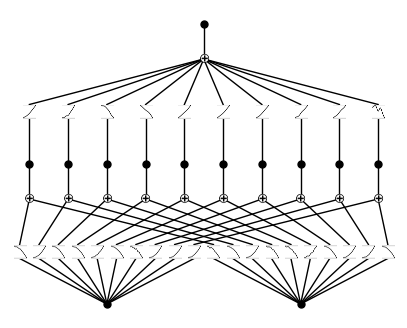

In [27]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

Обучение KAN с sparsity regularization

In [28]:
# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

| train_loss: 6.27e-01 | test_loss: 6.41e-01 | reg: 8.73e+00 | : 100%|█| 20/20 [00:17<00:00,  1.16it

saving model version 0.1


{'train_loss': [array(0.626653, dtype=float32),
  array(0.6268022, dtype=float32),
  array(0.6267061, dtype=float32),
  array(0.6267807, dtype=float32),
  array(0.6268562, dtype=float32),
  array(0.6267034, dtype=float32),
  array(0.62676555, dtype=float32),
  array(0.626794, dtype=float32),
  array(0.6268222, dtype=float32),
  array(0.62677354, dtype=float32),
  array(0.62677705, dtype=float32),
  array(0.62678856, dtype=float32),
  array(0.62677675, dtype=float32),
  array(0.6267628, dtype=float32),
  array(0.62676066, dtype=float32),
  array(0.6267734, dtype=float32),
  array(0.6267728, dtype=float32),
  array(0.6267874, dtype=float32),
  array(0.6267804, dtype=float32),
  array(0.6267711, dtype=float32)],
 'test_loss': [array(0.6411104, dtype=float32),
  array(0.6412091, dtype=float32),
  array(0.6411399, dtype=float32),
  array(0.64119494, dtype=float32),
  array(0.64140534, dtype=float32),
  array(0.64131916, dtype=float32),
  array(0.6413581, dtype=float32),
  array(0.641236, dt

Визуализация обученной KAN

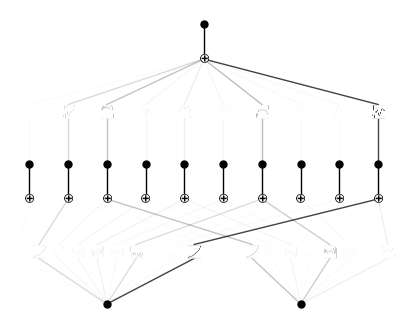

In [29]:
model.plot()

Проведение алгоритма прунинга и обновление визуализации

saving model version 0.2


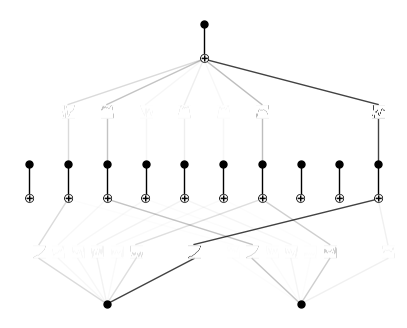

In [30]:
model.prune()
model.plot()

saving model version 0.2


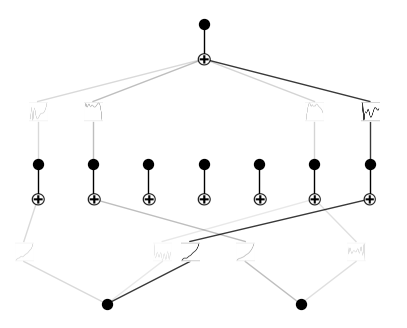

In [31]:
model = model.prune()
model(dataset['train_input'])
model.plot()

Продолжение обучение и перерисовка графика

In [32]:
# model.fit(dataset, opt="LBFGS", steps=50);

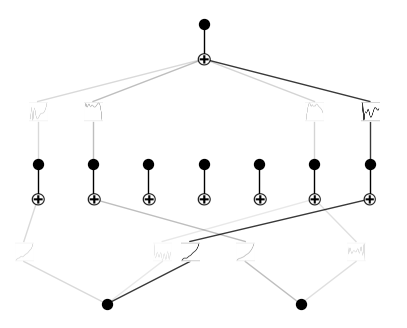

In [33]:
model.plot()

Автоматически или вручную установите символические функции активации

In [34]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.9310254454612732, c=1
fixing (0,0,1) with 0
fixing (0,0,2) with 0
fixing (0,0,3) with 0
fixing (0,0,4) with 0
fixing (0,0,5) with x, r2=0.05918624997138977, c=1
fixing (0,0,6) with x, r2=0.937213122844696, c=1
fixing (0,1,0) with 0
fixing (0,1,1) with log, r2=0.9991058707237244, c=2
fixing (0,1,2) with 0
fixing (0,1,3) with 0
fixing (0,1,4) with 0
fixing (0,1,5) with x, r2=0.03657234087586403, c=1
fixing (0,1,6) with 0
fixing (1,0,0) with x, r2=0.0029808070976287127, c=1
fixing (1,1,0) with x, r2=0.04668181762099266, c=1
fixing (1,2,0) with 0
fixing (1,3,0) with 0
fixing (1,4,0) with 0
fixing (1,5,0) with x, r2=4.592057393892901e-06, c=1
fixing (1,6,0) with x, r2=0.14369459450244904, c=1
saving model version 0.3


Можно продолжить обучение модели для достижения точности машинного вычисления

In [35]:
# model.fit(dataset, opt="LBFGS", steps=50);

Вывод символической формулы которая должна быть сильно близка к исходной

In [36]:
model.symbolic_formula()[0][0]

3.73233601268074e-5*x_1 - 5.96750468249026e-7*x_2 + 7.02346311340384e-6*log(7.43327951431274 - 6.06480026245117*x_2) - 0.000704739795456049